# 同花顺行业概念信息

In [1]:

import pandas as pd

fpath = r'../../JohnsonUtil\wencai\同花顺板块行业.xls'
thsgn = pd.read_excel(fpath)
thsgn = thsgn.set_index('股票代码')

## 查询信息

In [2]:
thsgn[:1]
thsgn.columns
thsgn.loc['300474.SZ']

股票简称                                                                  景嘉微
现价(元)                                                                  60
涨跌幅(%)                                                              -1.06
主营产品名称                  图形显控领域产品||小型专用化雷达领域产品||小型专业化雷达||图形显控模块产品||加固类产...
所属概念                    显卡;AI芯片;军民融合;雷达;深股通;人工智能;芯片设计;芯片概念;集成电路概念;军工;超...
所属同花顺行业                                                    国防军工-国防军工-军工电子
经营范围                    电子产品（不含电子出版物）、计算机软件的研究、开发、生产和销售及其相关的技术服务，集成电路设...
公司网站                                                 www.jingjiamicro.com
所属概念数量(个)                                                              19
a股流通市值 (元)2023.01.31                                          19023863000
Name: 300474.SZ, dtype: object

# Debug开启

In [3]:

# Delete Jupyter notebook root logger handler
# Set Debug
import logging
import sys

# %matplotlib inline
%matplotlib widget
# stdi, stdo, stde = sys.stdin, sys.stdout, sys.stderr
# # # reload(sys)
# # # sys.setdefaultencoding('utf-8')
# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde

# stdout = sys.stdout
# sys.path.append('../')
# import JSONData.tdx_data_Day as tdd
# sys.stdout = stdout


mylogger = logging.getLogger()
if len(mylogger.handlers) > 0:
    for ix in mylogger.handlers:
        print("handlers:%s std:%s" % (ix.stream, sys.stdout))
else:
    print("nb not handlers")
#     mylogger.propagate = False
mylogger.setLevel(logging.ERROR)
# mylogger.setLevel(logging.DEBUG)

print("nb:", sys.stderr)
# # Create logger as usual
import nest_asyncio

nest_asyncio.apply()

nb not handlers
nb: <ipykernel.iostream.OutStream object at 0x000002577EC05190>


# TDX多日数据分析

## 定义 TDX-Path

In [4]:
# encoding:utf-8
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
# InteractiveShell.ast_node_interactivity = "last_expr"

import sys

import pandas as pd
from pandas import HDFStore

stdi, stdo, stde = sys.stdin, sys.stdout, sys.stderr
# print(stdi, stdo, stde)
# reload(sys)
# sys.setdefaultencoding('utf-8')
# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde

# print(sys.stdout,sys.stderr,sys.stderr)

# print(stdi, stdo, stde)

# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde
# print(stdi, stdo, stde)

In [5]:
sys.path.append("../../")
import os

import JSONData.tdx_data_Day as tdd
# import win_unicode_console
from JohnsonUtil import commonTips as cct
from JSONData import sina_data

os.environ['NUMEXPR_MAX_THREADS'] = '12'

# import nest_asyncio
# nest_asyncio.apply()
# 查阅资料后发现，发现使用 jupyter notebook 环境，其连接着 IPython 内核，而 IPython 内核本身在事件循环上运行，而 asyncio 不允许嵌套其事件​​循环，因此会出现如上图的错误信息。
# nest_asyncio 作为异步操作的补丁而存在，具体内容请参考
# win_unicode_console.disable()
tdx_path = "G:\\tdx_last_df.h5"
sina_MultiD_path = "G:\\sina_MultiIndex_data.h5"
sina_d_path = "G:\\sina_data.h5"
sina_dd_path = "G:\\get_sina_all_dd.h5"
# print(stdi, stdo, stde)
sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde

# # 显示所有列
pd.set_option("display.max_columns", None)
# # 显示所有行
# pd.set_option('display.max_rows', None)
# # 设置 value 的显示长度为 100，默认为 50
# pd.set_option('max_colwidth',100)
# pd.set_option?
# df.columns.tolist()

In [6]:
cct.code_to_symbol_ths('000002')

'000002.SZ'

### 功能定义

In [7]:
def apply_col_toint(df, col=None):
    if col is None:
        co2int = ['boll', 'op', 'ratio', 'fib', 'fibl', 'df2']
    # co2int.extend([co for co in df.columns.tolist()
    #                if co.startswith('perc') and co.endswith('d')])
        co2int.extend(['top10', 'topR'])
    else:
        co2int = col
    co2int = [inx for inx in co2int if inx in df.columns]

    for co in co2int:
        df[co] = df[co].astype(int)

    return df


def readHdf5(fpath, root=None):
    store = pd.HDFStore(fpath, "r")
    print(store.keys())
    if root is None:
        root = store.keys()[0].replace("/", "")
    df = store[root]
    df = apply_col_toint(df)
    store.close()
    return df


def write_code_to_blk(codew, blk='090'):
    block_path = tdd.get_tdx_dir_blocknew() + '%s.blk' % (blk)
    write_blk = 'n'
    write_blk = cct.cct_raw_input("write blk [Y] or [N]:")
    if write_blk == 'y' or write_blk == 'Y':
        hdf5_wri = cct.cct_raw_input(
            "Rewrite code [Y] or append [N](defalut:N):")
        if hdf5_wri == 'y' or hdf5_wri == 'Y':
            append_status = False
        else:
            append_status = True
        if len(codew) > 3:
            cct.write_to_blocknew(block_path, codew, append_status,
                                  doubleFile=False, keep_last=0)
            ("write:%s block_path:%s" % (len(codew), block_path))
        else:
            ("write error:%s block_path:%s" % (len(codew), block_path))


def show_tdx_data(df, codelist=None, market_value='3', col=None):

    columns_ = [
        "name", "category", "close", "percent",'volra', 'topR', "lastp1d", "ma5dcum",
        "ma20d", "fib", "fibl", "ra", "ral", "df2", "per1d", "hmax", "lmin",
        "per%sd" % (market_value),
        "perc%sd" % (market_value)]
    if isinstance(df, pd.Series):
        columns_ = [co for co in columns_ if co in df.index]
    else:
        columns_ = [co for co in columns_ if co in df.columns]
    if col is not None:
        columns_.insert(4, col)

    if codelist is None:
        if isinstance(df, pd.Series):
            # print("Count:1")
            temp = df.loc[columns_]
        else:
            print("Count:%s %s" % (df.shape))
            temp = df.loc[:, columns_]
    else:
        temp = df.loc[[x for x in codelist if x in df.index], columns_]
    return temp


def compute_perd_value(df, market_value=3, col="per"):

    # if market_value == None or market_value < "2":
    #     market_value = 3
    # if market_value > 1 and len(df[ df["%s%sd" % (col, market_value)] > 2])   :
    market_value = str(market_value)
    if market_value > str(1):
        temp = df[
            df.columns[
                (df.columns >= "%s1d" % (col))
                & (df.columns <= "%s%sd" % (col, market_value))
            ]
        ]

        df['%s%sd' % (col, market_value)] = temp.T.sum().apply(
            lambda x: round(x, 1))
    else:
        print("market_value <= 1,No Compute")

    return df


def clean_688(df):
    df = df[(~df.index.str.contains("688"))]
    return df


from collections import Counter, OrderedDict


def counterCategory(df):
    top5 = dict()
    if len(df) > 0:
        categoryl = df.category[:20].tolist()
        dicSort = []
        for i in categoryl:
            if isinstance(i, str):
                # dicSort.extend([ co.decode('utf8') for co in i.split(';')])
                dicSort.extend(i.split(';'))
                # cate_list = i.split(';')
                # for co in cate_list:
                #     dicSort.append(to_str(co))
        topSort = Counter(dicSort)
        top5 = OrderedDict(topSort.most_common(5))
        # for i in top5.keys():
        # print(i, top5[i]),
        # print('')
    # for i in top5.keys():
    #     # print(u"板块:%s %s " % (i.decode('utf8'), (topSort[i]))),
    #     # print(u"板块:%s count:%s" % (i, (topSort[i]))),
    #     print(i, (topSort[i]))

    return top5


def get_runtime_percent(df, perd=None):
    if "percent" not in df.columns and "lastp1d" in df.columns:
        # print('init percent')
        df = df.fillna(0)
        df['percent'] = list(
            map(
                lambda x, y, z: round((x - y) / y * 100, 1)
                if x != y else round((x - z) / z * 100, 1),
                df.close, df.lastp1d, df.lastp2d))
        # df['percent'] = df.apply(lambda x: round((x.close - x.lastp1d) /(x.lastp1d) * 100, 1),axis=1)
    # else:
    #     print('Percent in columns')
    if not perd is None:
        df[perd] = list(map(lambda x, y: round((x + y), 1)
                            if int(y) > 0 else 0, df.perd, df.percent))
    return df


def get_realtime_ratio(df, market='all'):
    if 'ratio' in df.columns:
        df.drop('ratio', axis=1, inplace=True)
    ratio_df = tdd.getSinaJsondf(market)
    df = cct.combine_dataFrame(
        df, ratio_df.ratio, col=None, compare=None, append=False, clean=False)
    return df


def get_ths_info(code):
    code = cct.code_to_symbol_ths(code)
    return thsgn.loc[code]

### 还原Cell输出信息

In [8]:
# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde
# print(stdi, stdo, stde)

## 初始化 hdf5的tdx数据

In [9]:

market_value = "3"
df = readHdf5(tdx_path)
df = tdd.get_sina_datadf_cnamedf(df.index.tolist(), df)
df = compute_perd_value(df, market_value, "perc")
df = compute_perd_value(df, market_value, "per")

df = get_realtime_ratio(df)
# df=get_runtime_percent(df)

df = get_runtime_percent(df, "per%sd" % (market_value))

# filter 科创
df = clean_688(df)

df.shape
df[-1:].percent
df[~(df.last6vol > 0)][:10].last6vol
df.ratio[-2:]

['/low_d_60_y_all', '/low_w_180_y_all']


(4356, 119)

code
600020    0.8
Name: percent, dtype: float64

Series([], Name: last6vol, dtype: float64)

code
002638    1.0
600020    0.5
Name: ratio, dtype: float64

### test InStock

In [10]:
df.columns

Index(['lopen', 'lhigh', 'llow', 'lastp', 'lvol', 'lamount', 'ma5d', 'ma10d',
       'ma20d', 'upper',
       ...
       'lv', 'date', 'lowvol', 'last6vol', 'category', 'timel', 'close',
       'name', 'ratio', 'percent'],
      dtype='object', length=119)

## 个股数据查看

In [11]:
df.ma203d[:1]
# df.loc['003042'].loc[["category", "close"]]

code
301338    42.15
Name: ma203d, dtype: float64

In [12]:
show_tdx_data(df.loc['003042'])
get_ths_info('003042')

name                  中农联合
category    新股与次新股 ;核准制次新股
close                18.79
percent               -3.3
topR                     0
lastp1d              19.43
ma5dcum               20.2
ma20d                20.49
fib                      2
fibl                     1
ra                     4.0
ral                  -19.6
df2                      0
per1d                  0.4
hmax                 23.58
lmin                 19.33
per3d                  0.0
perc3d                 2.8
Name: 003042, dtype: object

股票简称                                                                 中农联合
现价(元)                                                               26.24
涨跌幅(%)                                                               0.92
主营产品名称                  吡虫啉||啶虫脒||烯啶虫胺||哒螨灵||低毒农药原药及其中间体||杀虫剂||杀菌剂||除草...
所属概念                                                  草甘膦;乡村振兴;中俄贸易概念;供销社
所属同花顺行业                                                      基础化工-化学制品-农药
经营范围                    生物、化学农药、化工产品及仪器仪表的技术开发、技术转让、技术咨询服务；农药（不含化学危险品）...
公司网站                                                       www.sdznlh.com
所属概念数量(个)                                                               4
a股流通市值 (元)2023.01.31                                           1787252200
Name: 003042.SZ, dtype: object

In [13]:
# df[(df.close > df.ma20d * 0.99) & (df.close < df.ma20d * 1.05)]

def filter_ma_range_df(df, ma='20', days='3'):
    dd = []
    for da in range(int(days), 0, -1):
        # print(da, ma)
        # df1 = df[ (df['lastp%sd'%(da)] > df['ma%s%sd'%(ma,da)]) & (df['lastp%sd'%(days)] < df['ma%s%sd'%(ma,da)] * 1.1)]
        df1 = df[(df['lastp%sd' % (da)] > df['ma%s%sd' % (ma, da)] * 0.99)]
        if da == days:
            dd = df1.index.tolist()
        else:
            dd = [x for x in dd if x in df1.index]

    return [x for x in set(dd)]


def get_union_list(maind, subd):
    # 筛选Main存在后切在新Sub出现
    return [x for x in maind if x in subd]

### 新农联合筛选

In [14]:
code_fs = '003042'
# show_tdx_data(df.loc['003042'])
# get_ths_info('003042')

df_f_t = df[(df.fib < 30) & (df.fibl > 6) & (df.df2 > 2) & (df.ral < -15) &
            (df.close >= df.ma5dcum) & (df.perc3d > 1.1) & (df.lastv1d > df.lastv2d) & (df.close > df.ma5d) ]

df_f_t.shape
# df_f_t.loc[code_fs][:1]
show_tdx_data(df_f_t)[:5]


(1, 119)

Count:1 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
001331,胜通能源,0,19.25,-4.1,1,20.08,18.4,18.07,26,9,0.0,-29.9,4,4.5,27.54,16.97,0.0,3.1


#### 写入069

In [15]:
# write_code_to_blk(df_f_t.index, '069')

In [16]:
df_ma26d = filter_ma_range_df(df, ma=20, days=5)
# 连续3日在生命线上
# df_ma26d = df[(df.fibl > 1) & (df.ra > 5)]
len(df_ma26d)
df_ma5d = filter_ma_range_df(df, ma=5, days=5)

# 连续3日在生命线上
len(df_ma5d)
df_x = get_union_list(df_ma26d, df_ma5d)
df_5dx_20d = get_union_list(df_x, df[df.ma5d < df.ma20d].index)

show_tdx_data(df.loc[df_5dx_20d])

398

604

Count:17 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
600269,赣粤高速,交通示范区;核电;参股券商,3.80,-1.0,0,3.84,3.8,3.85,39,6,0.0,-2.8,0,0.0,3.94,3.74,0.0,3.0
002228,合兴包装,供应链金融;人民币升值;食品包,3.23,-1.8,0,3.29,3.3,3.30,40,6,0.0,-2.9,0,0.3,3.36,3.18,0.0,3.1
601339,百隆东方,人民币贬值概念;东盟自贸区;S,5.68,-0.5,0,5.71,5.6,5.70,40,6,0.0,-14.6,0,1.1,6.44,5.53,0.0,3.1
002080,中材科技,污水处理;油改气;央企国资改革,21.95,-1.3,1,22.24,22.0,22.07,51,6,0.0,-5.9,2,-0.8,23.13,20.94,0.0,3.0
603815,交建股份,新股与次新股,7.24,1.0,0,7.17,7.1,7.14,41,6,0.0,-2.7,0,0.8,7.36,6.93,1.8,3.1
000546,ST金圆,固废处理;危废处理;中朝贸易区,6.52,-3.1,0,6.73,6.8,6.79,38,6,2.0,-23.8,0,-1.2,8.53,6.60,0.0,3.1
600493,凤竹纺织,人民币贬值概念;土地流转;福建,5.83,-3.2,0,6.02,5.9,5.96,41,8,0.0,-4.0,2,1.3,6.18,5.80,0.0,3.0
600527,江南高纤,尿不湿;两会;金改,2.03,-0.5,0,2.04,2.0,2.05,36,5,0.0,-3.8,0,0.0,2.11,1.99,0.0,1.0
002692,ST远程,智能电网;电缆;核电,3.75,1.1,0,3.71,3.7,3.74,31,6,2.0,-6.1,0,-0.3,3.91,3.69,0.8,0.0


In [17]:
df.loc[["603068", '601377', '000725'],
       ["date", "name", "category", "percent", "close", "lastp1d", "ma5d",
        "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
        "ra", "ral", "vcall", "vcra", "vchange", "lvol", 'lv', 'lowvol',
        'last6vol', 'per%sd' % (market_value),
        'perc%sd' % (market_value),
        'perc4d']][: 3]

,date,name,category,percent,close,lastp1d,ma5d,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,vcall,vcra,vchange,lvol,lv,lowvol,last6vol,per3d,perc3d,perc4d
code,,,,,,,,,,,,,,,,,,,,,,,,,,,
603068,2023-08-21,博通集成,新股与次新股,1.5,25.74,25.36,25.85,27.3,27.72,3,1,0,-0.9,30.92,25.48,10.0,-19.2,1480.6,2.0,-24.8,985800.0,112800.0,985800.0,985800.0,0.6,0.9,-1.1
601377,2023-06-26,兴业证券,参股新三板;MSCI概念;融资,1.3,6.82,6.73,7.01,7.1,6.97,41,1,2,-3.3,7.22,6.86,4.0,-9.7,1874.7,5.0,0.0,104766853.0,1768400.0,72997724.0,99256000.0,-2.0,-1.1,1.0
000725,2023-08-21,京东方Ａ,国开行;物联网;OLED,2.4,3.90,3.81,3.90,4.0,4.08,60,1,0,-1.3,4.37,3.86,10.0,-14.0,136.4,3.0,-5.3,193534088.0,137709691.0,193534088.0,173303092.0,1.1,-0.2,-0.1


In [18]:

sort_key2 = "per%sd" % (market_value)
df = df.sort_values(
    by=["perc%sd" % (market_value), sort_key2, "fib"], ascending=[0, 0, 1]
)
show_tdx_data(df)[: 5]

show_tdx_data(df)[-5:]
# df = df.sort_values(by=['perc%sd'%(market_value), 'per%sd'%(market_value),'fib'],ascending=[0,0,1])

Count:4356 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
605069,正和生态,新股与次新股 ;核准制次新股,12.55,10.0,1,11.41,9.3,9.64,41,8,0.0,4.3,3,10.0,10.32,9.01,20.0,3.3
000826,启迪环境,地下管网;新能源;低碳,5.07,10.0,2,4.61,3.4,3.41,41,6,0.0,10.0,7,10.0,3.30,3.18,20.0,3.3
605081,太和水,新股与次新股 ;核准制次新股,16.06,3.1,0,15.57,13.8,14.04,26,3,0.0,-8.3,0,10.0,16.62,13.36,13.1,3.3
300949,奥雅股份,融资融券 ;转融券标的 ;新股,41.07,2.1,0,40.22,38.1,39.58,41,4,0.0,-16.5,5,4.1,47.42,36.44,6.2,3.3
300899,上海凯鑫,节能环保 ;污水处理 ;融资融,27.95,1.0,0,27.67,25.3,25.65,41,6,0.0,-9.2,1,2.3,29.19,24.31,3.3,3.3


Count:4356 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
000050,深天马Ａ,国开行;裸眼3D;MSCI潜力,8.48,0.2,0,8.46,9.2,9.23,2,1,10.0,-13.1,0,-2.8,9.67,8.70,0.0,-2.3
300149,睿智医药,生物农药;二胎概念;创新药,7.60,-1.7,0,7.73,8.8,8.49,40,1,6.0,-20.6,5,-3.4,9.47,7.98,0.0,-2.3
002180,纳思达,核高基;3D打印;横琴新区,30.21,2.2,0,29.55,33.8,33.54,2,1,8.0,-29.4,0,-3.1,41.25,30.43,-0.9,-2.3
000963,华东医药,医疗改革;诺贝尔;胰岛素,37.23,1.4,-1,36.72,39.6,41.01,2,1,5.0,-20.9,0,-2.4,45.72,37.63,-1.0,-2.3
000656,金科股份,风电;MSCI潜力股;两江新区,1.94,102.1,-3,0.96,1.3,1.32,2,1,10.0,-50.3,0,-10.3,1.91,1.05,91.8,-3.3


## filter 20D 涨幅榜 

In [19]:
# df = df[(df['close'] > df['ma20d'] * 0.98) & (df['close'] < df['ma20d'] * 1.03)]
f20df = df[(df['close'] > df['ma20d'] * 0.98)
           & (df['df2'] > 0) & (df['lastp1d'] > df['ma5d']) & (df['lasth1d'] >= df['lasth2d']) ]

f20df.shape
show_tdx_data(f20df)[: 3]
show_tdx_data(f20df)[-3:]

(169, 119)

Count:169 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
605069,正和生态,新股与次新股 ;核准制次新股,12.55,10.0,1,11.41,9.3,9.64,41,8,0.0,4.3,3,10.0,10.32,9.01,20.0,3.3
000826,启迪环境,地下管网;新能源;低碳,5.07,10.0,2,4.61,3.4,3.41,41,6,0.0,10.0,7,10.0,3.30,3.18,20.0,3.3
300949,奥雅股份,融资融券 ;转融券标的 ;新股,41.07,2.1,0,40.22,38.1,39.58,41,4,0.0,-16.5,5,4.1,47.42,36.44,6.2,3.3


Count:169 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
300169,天晟新材,土壤修复;固废处理;新材料概念,9.02,8.9,0,8.28,8.3,7.39,41,5,0.0,-16.4,21,9.7,8.55,7.22,18.6,0.9
300561,汇金科技,物联网;人工智能;高送转,13.72,6.2,0,12.92,12.8,12.59,20,5,0.0,-8.0,5,4.8,13.75,11.73,11.0,0.9
002771,真视通,军民融合,16.49,6.2,0,15.53,16.1,16.61,60,2,8.0,-21.2,12,3.1,19.05,14.93,9.3,0.9


In [20]:

sort_key2 = "per%sd" % (market_value)

f20df = f20df.sort_values(
    by=[sort_key2, "perc%sd" % (market_value), "fib"], ascending=[0, 0, 1]
)
f20df.shape
show_tdx_data(f20df)[: 5]

show_tdx_data(f20df)[-5:]


# df.loc[:, ["name"]].T

(169, 119)

Count:169 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
301316,慧博云通,0,43.22,20.0,0,36.02,32.7,29.99,29,5,0.0,-9.0,14,3.7,34.29,28.04,23.7,3.0
301085,亚康股份,融资融券 ;转融券标的 ;新股,80.50,11.6,0,72.12,64.0,63.47,60,6,0.0,-22.5,4,10.0,90.60,57.17,21.6,3.0
301169,零点有数,融资融券 ;转融券标的 ;新股,53.88,20.0,0,44.90,43.0,42.14,15,6,0.0,-23.7,2,1.0,54.96,40.97,21.0,3.1
300977,深圳瑞捷,融资融券 ;转融券标的 ;新股,25.20,14.2,0,22.07,20.0,20.53,58,6,0.0,-13.5,8,6.1,24.25,18.51,20.3,3.2
605069,正和生态,新股与次新股 ;核准制次新股,12.55,10.0,1,11.41,9.3,9.64,41,8,0.0,4.3,3,10.0,10.32,9.01,20.0,3.3


Count:169 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
002663,普邦股份,园林开发;固废处理;移动互联网,2.09,-2.8,0,2.15,2.1,2.07,52,6,0.0,-3.6,4,4.9,2.13,1.93,0.0,1.1
000596,古井贡酒,大消费;白酒;参股券商,268.23,-0.4,-1,269.36,267.7,267.78,52,6,0.0,-8.7,1,1.3,277.56,259.09,0.0,1.1
301333,诺思格,注册制次新股 ;融资融券 ;转,53.26,-1.4,0,53.99,53.2,52.72,29,1,0.0,-15.8,2,6.4,63.53,50.70,0.0,1.0
600621,华鑫股份,参股外资金融;上海国资改革;参,13.28,0.2,0,13.25,12.9,12.53,41,5,0.0,-7.7,8,4.6,14.16,12.14,0.0,1.0
001213,中铁特货,央企国资改革 ;中铁系 ;核准,4.76,1.1,0,4.71,4.5,4.54,39,5,0.0,-3.9,1,-3.9,4.65,4.37,-2.8,3.2


In [21]:
# code = ["000725"]
# f20df.loc[code,
#           ["name", "close", "percent", "lastp1d", "ma5dcum", "ma20d", "fib",
#            "fibl", "ra", "df2", "per1d", "hmax", "lmin", "per%sd" %
#            (market_value),
#               "perc%sd" % (market_value)]]

## Write code to blk 

In [22]:


# codew = df.index.tolist()
# write_code_to_blk(codew)

# TDX参数数据信息

In [23]:
# code = '002670'
# tdf = tdd.get_tdx_Exp_day_to_df(code, dl=60).sort_index(ascending=True)
# tdf.dropna(inplace=True)
# tdf.loc[:, ["close", "ma5d", "ma10d",
#             "ma20d", "upper", "lower", "hmax", "lmin"]].plot()
# tdf = compute_perd_value(tdf, market_value, "per")

# 实时sina_MultiIndex 分析

## 初始化当日Multi

In [24]:
# ohlc_dict = {'open': 'first',
#              'high': 'max',
#              'low': 'min',
#              'close': 'last'}

ohlc_dict = {
    'volume': 'sum',
    'high': 'max',
    'low': 'min',
    'close': 'last'}


def minmax_norm(df):
    return ((df - df.min()) / (df.max() - df.min())).apply(lambda x: round(x, 2))

# def apply_round(df):
#     return df.apply(lambda x:round(x,2))


import pandas as pd
from pandas import HDFStore

# sina_MultiD_path = "G:\\sina_MultiIndex_data.h5"
# freq='30T'
# startime = '09:25:00'
# endtime = '15:01:00'
# def readHdf5(fpath, root=None):
#     store = pd.HDFStore(fpath, "r")
#     print((store.keys()))
#     if root is None:
#         root = list(store.keys())[0].replace("/", "")
#     df = store[root]
#     store.close()
#     return df

h5 = readHdf5(sina_MultiD_path)
print(sina_MultiD_path)
h5.shape
# h5[:1]
code_muti = '600519'
h5.loc[code_muti][:2]
h5.loc[code_muti][-1:]

['/all_10']
G:\sina_MultiIndex_data.h5


(1366715, 6)

,close,high,low,llastp,volume,lastbuy
ticktime,,,,,,
2023-08-22 10:04:25,1792.36,1800.99,1786.19,1791.0,482487,1792.36
2023-08-22 10:05:01,1792.32,1800.99,1786.19,1791.0,487187,1792.36


,close,high,low,llastp,volume,lastbuy
ticktime,,,,,,
2023-08-22 15:00:01,1788.0,1802.56,1771.02,1791.0,2665036,1778.15


## Now freq = 'D' 总量占比

In [25]:
# h5_ohlc = h5.loc[code_muti, ['close', 'volume']]
# h5_ohlc_Day = h5_ohlc.groupby(pd.Grouper(
#     freq='1D', closed='right', label='right')).agg(
#     ohlc_dict).dropna()
# freq = '30T'
freq = 'D'
startime = '09:25:00'
endtime = '15:01:00'

time_ratio = cct.get_work_time_ratio()

run_col = ['close', 'volume']
mdf = cct.get_limit_multiIndex_freq(
    h5, freq=freq.upper(),
    col=run_col, start=startime, end=endtime, code=None)
allvol = mdf.volume.sum()
allvol / 1000 / 1000 / 1000
mdf.loc['002195'].volume / mdf.loc['600705'].volume
ndf = mdf.copy()
ndf.info(show_counts=True)
ndf.describe()

11769.411048875998

ticktime
2023-08-23    0.949895
Freq: D, Name: volume, dtype: float64

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4904 entries, ('000001', Timestamp('2023-08-23 00:00:00', freq='D')) to ('689009', Timestamp('2023-08-23 00:00:00', freq='D'))
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   4904 non-null   float64
 1   volume  4904 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 258.5+ KB


,close,volume
count,4904.000000,4.904000e+03
mean,20.191815,2.399961e+09
std,36.555833,6.254826e+09
min,0.000000,0.000000e+00
25%,6.592568,4.077305e+08
50%,12.373424,9.696620e+08
75%,22.957233,2.237773e+09
max,1786.657681,1.832272e+11


### TDX filter Vol and fibl

####  9日交易量nvol_idx 

In [26]:
# 9日交易量Mean
temp = df[df.columns[((df.columns >= 'lastv1d') & (df.columns <= 'lastv9d'))]]
temp.shape, temp.columns
temp['volmean'] = temp.mean(axis=1)
# temp[:1]
temp['volnow'] = round(temp['lastv1d'] / temp['volmean'], 2)
nvol_idx = temp.sort_values(by=['volnow'], ascending=[0])
# nvol_idx.index
nvol_idx.loc[:, ['volnow']].T[:20]
df = get_realtime_ratio(df)

show_tdx_data(df, nvol_idx.index[:20], col='ratio').T
nvol_idx.shape

((4356, 9),
 Index(['lastv1d', 'lastv2d', 'lastv3d', 'lastv4d', 'lastv5d', 'lastv6d',
        'lastv7d', 'lastv8d', 'lastv9d'],
       dtype='object'))

code,002089,000995,600796,001333,600292,001213,605081,300865,601008,002887,001202,301115,301109,300854,002724,002822,300190,002394,003027,600009,600004,000863,605598,600455,601022,002193,301137,603568,605069,002094,300195,600293,300433,301175,300970,603701,001300,301265,002983,301273,600070,300864,001230,000655,000786,603078,000809,603817,301195,002816,600168,300972,002916,301081,301219,002672,000955,603221,603717,300961,000692,000544,002158,002927,002006,000820,300690,300958,300177,000683,000822,002468,600323,301156,002442,600618,301131,600583,301171,002772,301053,000707,000089,300799,300056,301049,300385,301048,300642,002765,300391,300815,002433,301188,300439,600461,000605,605303,601606,603198,300494,301035,301178,002485,000010,300172,600798,002698,002735,000915,002311,300846,300929,603022,002663,603755,000567,603408,600262,300388,300555,600687,300861,300070,603697,300981,600818,300274,002301,601968,300948,001225,000766,603855,301061,600847,603130,000818,601339,600873,601200,301062,002829,002812,000008,603725,600125,002381,600502,601368,000803,003007,002860,600838,301327,002298,600539,000752,001965,603222,600107,600526,300596,300305,002569,001215,300731,603365,603893,300594,000982,300787,600377,300977,605287,300196,603280,000708,002161,600008,605398,002040,002210,601158,300906,301196,600452,600258,605016,002026,003018,605189,000726,300603,002331,600548,600316,603607,000830,603278,300649,300823,002879,601156,002008,300422,002658,600889,002553,600515,002557,002527,605499,603898,600350,300200,300197,300867,300548,002588,300368,301127,300996,002333,603722,300899,002802,300180,002278,300607,603843,001210,300152,301056,300286,301098,000514,002767,000048,300141,600673,300201,300240,301082,301259,605086,603668,600704,603955,600232,300913,603903,601006,300986,300128,600882,603588,601827,300722,003023,002703,301288,603926,600845,001267,600971,300427,000429,002162,300856,603155,003039,300868,000720,600582,002352,603662,300011,000615,600421,600621,000622,600246,600371,601222,300682,002088,002512,600215,300765,002835,000598,300945,003038,600190,000050,002774,301129,002798,603605,603385,301043,002895,300320,603377,603585,600874,002785,301223,300117,001296,001256,603939,000669,300321,002367,603318,002034,300139,301213,603657,603389,603086,600698,300942,002552,605028,002246,600156,300468,300556,300637,301359,603511,000525,301181,000898,603967,002479,603729,002573,002851,000596,300262,301042,002778,600097,601330,002327,300800,600869,002973,002198,600787,300373,002481,002609,600388,002718,300462,605055,603033,600299,603787,003000,600897,003028,300766,002730,600235,603659,300895,301019,600057,300103,300810,603071,301380,002532,301396,600216,600236,300425,300833,300726,002790,000046,002430,002700,300593,603929,300713,600939,603003,001331,600689,601666,300645,600332,002415,001317,300550,300692,002357,603728,300055,603267,603797,300014,300329,601958,002452,300610,001219,600605,600563,002455,002154,600567,605122,002800,300622,003001,001336,300836,600279,300957,301318,601336,600512,600356,601366,301077,300965,002487,603983,002320,001228,300953,002717,002960,002889,001226,600679,603949,001266,002740,600051,300851,603195,300355,603869,000543,300679,603028,002302,600794,603648,605060,000885,600462,002963,603819,300402,300214,603836,301256,300847,300137,002665,603183,000068,000685,601996,301002,002517,300644,002913,002616,603901,002771,002890,300984,603238,000590,300187,300661,605286,603390,300167,300700,605088,000967,002584,301333,003008,300743,002511,300013,003009,603058,300509,605368,300478,000927,601000,600226,600387,002902,600039,300592,603813,002003,300237,603822,300374,002885,300538,002899,601601,600828,600083,605138,603321,000034,300768,600990,301033,603128,001234,605305,300671,603810,600508,603261,603017,601636,600521,603518,605066,300997,603083,002267,600094,300789,002105,601866,300282,600036,601208,002970,603041,605001,300535,000507,600745,600444,600826,601919,603220,300921,300617,300703,600710,600685,002283,603167,603519,600769,002925,00221

code,002089,000995,600796,001333,600292,001213,605081,300865,601008,002887,001202,301115,301109,300854,002724,002822,300190,002394,003027,600009
name,*ST新海,皇台酒业,钱江生化,光华股份,远达环保,中铁特货,太和水,大宏立,连云港,绿茵生态,炬申股份,建科股份,军信股份,中兰环保,海洋王,中装建设,维尔利,联发股份,同兴环保,上海机场
category,云服务;军民融合;华为概念,保健品;白酒;葡萄酒替白酒,吡啶;生物农药;壳资源,0,PM2.5;期货概念;两江新区,央企国资改革 ;中铁系 ;核准,新股与次新股 ;核准制次新股,一带一路 ;融资融券 ;转融券,一带一路;中韩自贸区;地方国资,土壤修复;园林开发;雄安新区,新股与次新股 ;核准制次新股,0,垃圾发电 ;绿色电力 ;融资融,融资融券 ;转融券标的 ;注册,军工;节能照明,绿色建筑;PPP概念,危废处理;低碳;节能环保,大上海;人民币贬值概念;外贸,新股与次新股 ;核准制次新股,上海自贸区;春运;迪士尼
close,1.14,19.67,5.63,26.6,6.76,4.76,16.06,23.67,4.44,9.68,15.98,24.8,16.87,18.03,8.13,4.55,4.43,8.81,19.82,40.08
percent,12.9,-5.3,-8.0,-5.3,-6.9,1.1,3.1,-9.9,-3.7,-5.4,-4.0,-0.4,-1.1,-7.5,-3.6,-3.6,-5.5,-4.9,-4.8,-2.8
ratio,3.8,15.5,15.2,29.3,11.3,11.7,24.6,32.1,3.7,13.0,28.1,10.2,4.7,24.3,3.1,11.3,6.3,10.7,8.5,2.2
topR,-9,2,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
lastp1d,1.01,20.78,6.12,28.08,7.26,4.71,15.57,26.28,4.61,10.23,16.64,24.89,17.06,19.5,8.43,4.72,4.69,9.26,20.82,41.25
ma5dcum,1.3,17.2,5.5,25.3,6.0,4.5,13.8,21.1,4.4,9.3,15.6,23.2,16.4,17.0,7.6,4.4,4.2,8.4,19.6,46.4
ma20d,1.57,17.28,5.5,25.6,6.11,4.54,14.04,22.02,4.46,9.43,15.84,23.71,16.69,17.22,8.01,4.45,4.22,8.51,20.15,46.0
fib,2,28,41,41,41,39,26,52,41,41,41,41,3,41,3,41,40,41,3,21


(4356, 11)

In [27]:
df.shape
df.loc['002197'].per3d

(4356, 119)

3.7

##### TDX Filter Vol 写入090

write_code_to_blk(vdf.index.tolist())

#### 连续放量4日v_idx

In [28]:
# print("连续增量:%s"%(v_idx.shape))
v4_idx = nvol_idx[(nvol_idx.lastv1d > nvol_idx.lastv2d) &
                  (nvol_idx.lastv2d > nvol_idx.lastv3d) &
                  (nvol_idx.lastv3d > nvol_idx.lastv4d)]
v4_idx.shape
v4_idx.loc[:, ['volnow']][:20].T
df = get_realtime_ratio(df)
show_tdx_data(df, v4_idx.index[:10], col='ratio')

(309, 11)

code,002089,600796,600292,001213,605081,300865,601008,002887,001202,301115,301109,300854,002724,300190,003027,600009,600455,601022,301137,605069
volnow,8.4,5.85,5.07,4.87,4.84,4.66,4.48,4.42,4.4,4.28,4.28,4.14,4.11,4.02,3.94,3.93,3.66,3.63,3.5,3.44


,name,category,close,percent,ratio,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,,
002089,*ST新海,云服务;军民融合;华为概念,1.14,12.9,3.8,-9,1.01,1.3,1.57,2,2,10.0,-62.0,0,1.0,2.56,1.00,13.9,-2.1
600796,钱江生化,吡啶;生物农药;壳资源,5.63,-8.0,15.2,0,6.12,5.5,5.50,41,6,0.0,6.8,1,9.5,5.54,5.32,0.0,3.3
600292,远达环保,PM2.5;期货概念;两江新区,6.76,-6.9,11.3,0,7.26,6.0,6.11,41,5,0.0,10.0,1,10.0,6.14,5.82,0.0,3.3
001213,中铁特货,央企国资改革 ;中铁系 ;核准,4.76,1.1,11.7,0,4.71,4.5,4.54,39,5,0.0,-3.9,1,-3.9,4.65,4.37,-2.8,3.2
605081,太和水,新股与次新股 ;核准制次新股,16.06,3.1,24.6,0,15.57,13.8,14.04,26,3,0.0,-8.3,0,10.0,16.62,13.36,13.1,3.3
300865,大宏立,一带一路 ;融资融券 ;转融券,23.67,-9.9,32.1,0,26.28,21.1,22.02,52,6,0.0,2.9,4,10.0,24.81,20.24,0.0,3.3
601008,连云港,一带一路;中韩自贸区;地方国资,4.44,-3.7,3.7,1,4.61,4.4,4.46,41,6,0.0,0.9,0,4.1,4.55,4.34,0.0,3.1
002887,绿茵生态,土壤修复;园林开发;雄安新区,9.68,-5.4,13.0,0,10.23,9.3,9.43,41,4,0.0,1.6,1,7.1,9.77,8.93,0.0,3.3
001202,炬申股份,新股与次新股 ;核准制次新股,15.98,-4.0,28.1,0,16.64,15.6,15.84,41,6,0.0,-4.7,1,-4.7,16.09,15.02,0.0,3.2


##### 连续放量写入064

write_code_to_blk(v_idx.index.tolist(),'064')

##### 连续3日放量

In [29]:

v3_idx = df[(df.lastv1d > df.lastv2d) & (df.lastv1d / df.lastv2d > 1.5) &
            (df.close > df.ma20d) & (df.close < df.ma5d * 1.05) & (df.fibl > 3)  & (df.perc3d > 2) ]
# & (df.close > df.ma20d) & (df.close < df.ma5d * 1.05) & (df.fibl > 3) & (df.df2 > 0) & (df.close > df.hmax) & (df.perc3d >3) ]

v3_idx.shape
v3_idx[:1]

(47, 119)

,lopen,lhigh,llow,lastp,lvol,lamount,ma5d,ma10d,ma20d,upper,lower,ene,op,fib,ldate,topU,eneU,upperT,upperL,top0,topR,topD,ral,up5,perd,lastdu,perlastp,fibl,boll,df2,kdj,macd,rsi,ma,oph,rah,vchange,vcra,ma5vol,vcall,lasto1d,lasth1d,lastl1d,lastv1d,lastp1d,per1d,ma51d,ma201d,perc1d,lasto2d,lasth2d,lastl2d,lastv2d,lastp2d,per2d,ma52d,ma202d,perc2d,lastp3d,lastv3d,per3d,ma53d,ma203d,perc3d,lastp4d,lastv4d,per4d,ma54d,ma204d,perc4d,lastp5d,lastv5d,per5d,ma55d,ma205d,perc5d,lastp6d,lastv6d,per6d,ma56d,ma206d,perc6d,lastp7d,lastv7d,per7d,ma57d,ma207d,perc7d,lastp8d,lastv8d,per8d,ma58d,ma208d,perc8d,lastp9d,lastv9d,per9d,ma59d,ma209d,perc9d,top10,ma5dcum,ra,hmax,max5,lmin,min5,cmean,hv,lv,date,lowvol,last6vol,category,timel,close,name,percent,ratio
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
603668,14.48,14.48,14.04,14.06,7564350.0,121415701.0,15.69,15.52,15.61,17.3,14.2,15.8,-101,27,2023-05-26,0.0,9.0,0.0,0.0,0.0,0,0.0,-4.4,4.0,2.4,4.1,1.1,6,0,0,1.0,1.0,1.0,1.0,1.0,1.0,162.4,7.0,5842825.0,1527.1,15.65,16.25,15.59,7564350.0,16.05,2.4,15.69,15.61,1.1,15.73,15.95,15.61,2882558.0,15.67,-0.4,15.62,15.54,1.0,15.74,3131595.0,0.0,15.52,15.5,3.2,15.41,5758540.0,-1.0,15.43,15.45,-0.1,15.57,4548500.0,-1.0,15.38,15.43,1.0,15.72,5316100.0,3.8,15.35,15.41,1.1,15.15,2549892.0,-1.0,15.3,15.38,0.0,15.31,3237645.0,1.1,15.45,15.32,1.1,15.14,3054200.0,-1.8,15.58,15.28,-0.1,0,15.5,0.0,16.71,15.72,15.0,15.0,15.6,16985200.0,230300.0,2023-07-14,5842825.0,2882558.0,饲料,1.692670e+09,15.96,天马科技,-0.6,NaN


## Realtime 总量Vol占比

In [30]:
nowdf = ndf.copy()
nowdf['volume'] = ndf.volume.apply(
    lambda x: round(x / allvol * 100 / time_ratio, 2))
# 交易量排序

In [31]:
nowdf = nowdf.sort_values(by=['volume'], ascending=[0])
# nowdf.shape, df.shape, code_idx.shape
top20_nd = nowdf.reset_index().loc[:, ['code', 'volume']][:20]
# code_idx = top20_nd.code
# top20_nd.T
# df.loc['600705']
# show_tdx_data(df, code_idx)[:10]

### 交易量排序写入077


write_code_to_blk(code_idx,'077')

In [32]:
# 30M

In [33]:
h5_ohlc = h5.loc[code_muti, ['close', 'volume']]
h5_ohlc['low'] = h5_ohlc['close']
# h5_ohlc['open'] = h5_ohlc['close']
h5_ohlc['high'] = h5_ohlc['close']

h5_ohlc_30M = h5_ohlc.groupby(pd.Grouper(
    freq='30Min', closed='right', label='right')).agg(
    ohlc_dict).dropna()
# h5_ohlc_30M['volume'] = h5_ohlc_30M['volume'].apply(lambda x:round(x/100100,1))
h5_ohlc_30M['volume'] = minmax_norm(h5_ohlc_30M['volume'])
h5_ohlc_30M[:1], h5_ohlc_30M[-1:]

(                     volume    high      low   close
 ticktime                                            
 2023-08-22 10:30:00    0.15  1798.0  1791.99  1798.0,
                      volume    high     low   close
 ticktime                                           
 2023-08-22 15:30:00     0.0  1788.0  1788.0  1788.0)

In [34]:
df.shape

(4356, 119)

# 当日Sina数据分析

## Sina_Data

In [35]:
# tdf = readHdf5(tdx_path)
tdf = tdd.get_sina_datadf_cnamedf(df.index.tolist(), df)
# tdf[ (tdf.last6vol > 0)].shape
tdf = clean_688(tdf)
# tdf[ (tdf.last6vol > 0)].shape
# market_value = '5'

# 统计连续数据
for i in range(9, 1, -1):
    # print(i),
    tdf = compute_perd_value(tdf, i, "perc")
    tdf = compute_perd_value(tdf, i, "per")
    # tdf = get_runtime_percent(tdf,"per%sd"%(i))

tdf = get_runtime_percent(tdf)

tdf[(tdf.last6vol > 0)].shape
tdf.loc[:, ['percent', 'perc1d', 'perc2d', 'perc3d', 'perc9d',
            'per1d', 'per2d', 'per3d', 'per9d']][:5]

(4356, 119)

,percent,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,,
603198,1.3,1.1,2.1,5.3,10.3,6.3,0.7,8.3,7.5
000429,2.1,1.1,2.1,5.3,8.3,1.2,1.5,4.8,5.2
301182,1.5,1.0,2.1,5.3,8.0,0.0,2.1,3.6,-0.7
301043,1.0,1.0,2.1,5.3,7.3,-0.8,1.2,1.4,-0.9
301028,-1.0,1.0,2.1,5.3,6.3,-0.1,0.7,0.7,-2.8


In [36]:
sina = sina_data.Sina()
dd = sina.all
# dd.loc['300250'].close
if (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 926):
    dd = dd[dd.close > 0]
else:
    dd = dd[dd.open > 0]

if 'percent' not in dd.columns:
    print("compute percent")
    dd['percent'] = ((dd['close'] - dd['llastp']) / dd['llastp']
                     * 100).map(lambda x: round(x, 2))

# # dd.shape
# dd.loc[:, ['percent', 'close']][:1]
# dd = clean_688(dd)
print(dd.shape)
if 'nclose' in dd.columns:
    for co in ['nclose']:
        dd[co] = dd[co].apply(lambda x: round(x, 2))

dd = get_realtime_ratio(dd)
# dd = tdd.getSinaAlldf(market='all')
dd = clean_688(dd)
# get_sina_Market_json 获取 Ratio数据
# df.shape
# h5 = readHdf5(sina_MultiD_path)
# h5.shape
# h5[:1]
# tdf['last6vol'][:2]

# dd=cct.combine_dataFrame(dd, df['last6vol'])
# dd=cct.combine_dataFrame(dd, tdf['last6vol'], col=None, compare=None, append=False, clean=True)

compute percent
(4898, 42)


In [37]:
'ratio' in dd.columns
dd.columns
dd.shape
dd.percent[:1]
dd.loc['300250'].close, dd.loc['300250'].percent

True

Index(['name', 'open', 'llastp', 'now', 'trade', 'high', 'low', 'buy', 'sell',
       'volume', 'turnover', 'b1_v', 'b1', 'b2_v', 'b2', 'b3_v', 'b3', 'b4_v',
       'b4', 'b5_v', 'b5', 'a1_v', 'a1', 'a2_v', 'a2', 'a3_v', 'a3', 'a4_v',
       'a4', 'a5_v', 'a5', 'dt', 'ticktime', 'b1_vv', 'close', 'nvol',
       'lastbuy', 'timel', 'nlow', 'nhigh', 'nclose', 'percent', 'ratio'],
      dtype='object')

(4386, 43)

code
000828   -0.42
Name: percent, dtype: float64

(14.9, 3.76)

### 设置周期时间

In [38]:
tdf.loc[:, ['perc1d', 'perc2d', 'perc3d', 'perc9d',
            'per1d', 'per2d', 'per3d', 'per9d']][-5:]
tdf.loc['300250'].close, tdf.loc['300250'].percent
# tdf = compute_perd_value(tdf, market_value, "perc")
# tdf = compute_perd_value(tdf, market_value, "per")

,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,
002812,-1.1,-2.2,-4.5,-2.9,-5.4,-7.8,-7.8,-13.7
000050,-1.1,-2.2,-4.5,-2.7,-2.8,-5.0,-5.0,-8.7
300149,-1.1,-2.2,-4.5,-0.6,-3.4,-9.2,-9.2,-15.1
000963,-1.1,-2.2,-4.5,-1.5,-2.4,-4.7,-5.7,-6.1
000656,-1.1,-2.2,-5.5,-9.8,-10.3,-14.8,77.0,63.7


(14.9, 3.8)

In [39]:
# dd=cct.combine_dataFrame(dd, tdf['last6vol'], col=None, compare=None, append=False, clean=True)
# dd.loc[:,['percent']][:1]
dd = cct.combine_dataFrame(dd, df, append=False, clean=False)

dd.loc[:, ['percent']][:1]
dd[~(dd.last6vol > 0)].shape
dd.loc['300250'].close, dd.loc['300250'].percent
# dd[:1]

,percent
code,
301297,1.91


(35, 157)

(14.9, 3.76)

In [40]:
dd_clean = dd[~(dd.last6vol > 0)]
display(dd_clean.shape, dd_clean.index.tolist()[:5])
dd = dd[(dd.last6vol > 0)]
dd.shape

(35, 157)

['301297', '603173', '301246', '301303', '603281']

(4351, 157)

In [41]:
# display(dd_clean.shape, dd_clean.index)
# adf = df.copy()
# %timeit -r 5 adf['upper'] = map(lambda x: round((1 + 11.0 / 100) * x, 1), df.ma10d)
# %timeit -r 5 adf['lower'] = map(lambda x: round((1 - 9.0 / 100) * x, 1), df.ma10d)
# %timeit -r 5 adf['ene'] = map(lambda x, y: round((x + y) / 2, 1), adf.upper, adf.lower)

### 计算Vol Ratio倍率

In [42]:
# store = pd.HDFStore(sina_MultiD_path, "r")
# (store.keys())
# store.close()
# dd.columns
# dd.loc[:, ['open', 'llastp', 'nlow', 'low', 'nhigh', 'nhigh',
#        'low', 'volume', 'lastbuy','last6vol']][:1]
# dd.shape
time_ratio = cct.get_work_time_ratio()
time_ratio
dd['volra'] = list(map(lambda x, y: round((x / y), 1),
                       dd.volume / time_ratio, dd.last6vol))

dd.shape
dd[~(dd.volra > 0)].shape
dd.loc['301227', ['volra', 'vchange']]
# nldf.loc[:, ['close', 'nclose', 'llastp', 'open', 'nlow', 'low', 'nhigh',
#              'nhigh', 'low', 'volra', 'last6vol', 'volume', 'ticktime']][:2]

1.0

(4351, 158)

(0, 158)

volra      1.2
vchange   -1.1
Name: 301227, dtype: object

### open > nlow and UP

In [43]:
if 'nlow' in dd.columns:
    dd_open = dd[(dd.open == dd.nlow) & (dd.close >= dd.open) & (dd['volra'] > 1.2)]
else:
    dd_open = dd[(dd.open == dd.low) & (dd.close >= dd.open) & (dd['volra'] > 1.2)]
dd_open.shape

(128, 158)

In [44]:
# dd.columns[ (dd.columns >= 'perc1d') &  (dd.columns <= 'perc9d')]
show_tdx_data(dd_open[(dd_open.per1d >= 1)]).T

Count:27 158


code,002235,300287,301248,301185,002771,000766,605398,300047,300847,300608,301316,002474,300560,601728,002642,300448,002584,300561,300025,000752,300605,300442,601702,300250,603887,300600,301380
name,安妮股份,飞利信,杰创智能,鸥玛软件,真视通,通化金马,新炬网络,天源迪科,中船汉光,思特奇,慧博云通,榕基软件,中富通,中国电信,荣联科技,浩云科技,西陇科学,汇金科技,华星创业,*ST西发,恒锋信息,润泽科技,华峰铝业,初灵信息,城地香江,国瑞科技,挖金客
category,微信小程序;幼儿教育;王亚伟,流媒体;云计算;参股保险,数据中心 ;融资融券 ;转融券,融资融券 ;转融券标的 ;新股,军民融合,抗癌;医疗改革;民营医院,新股与次新股 ;核准制次新股,腾讯概念;易信;IPV6,央企国资改革 ;新股与次新股,移动互联网;大数据;5G,0,电子信息;依法治国概念;现代服,5G;数字中国;军工,5G运营商 ;央企国资改革 ;,参股新三板;基因芯片;云计算,智能医疗;智能交通;高送转,塑化剂;电子商务;体外诊断,物联网;人工智能;高送转,智慧城市;华为概念;云计算,啤酒;股权转让;大消费,智慧城市;数字中国,食品包装,新股与次新股 ;核准制次新股,三网融合;G20峰会;智能家居,PPP概念,军民融合;高送转;军工,0
close,9.42,4.21,21.83,26.85,16.49,6.03,31.02,7.76,18.56,10.38,43.22,7.89,17.92,5.99,6.9,6.11,6.14,13.72,13.52,9.12,15.87,23.61,14.99,14.9,8.26,11.04,70.67
percent,10.05,4.47,5.82,5.01,6.18,0.84,10.0,3.74,5.33,7.79,19.99,5.48,11.03,5.46,2.83,5.34,4.42,6.19,5.62,-5.0,4.61,2.43,3.17,3.76,4.82,1.56,20.0
volra,2.9,1.9,3.1,2.0,2.8,5.0,1.3,1.8,5.4,2.7,1.9,2.7,7.0,3.3,1.6,1.6,2.6,2.6,1.9,21.2,3.3,6.1,2.8,1.5,3.1,2.0,4.3
topR,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
lastp1d,8.56,4.03,20.63,25.57,15.53,5.98,28.2,7.48,17.62,9.63,36.02,7.48,16.14,5.68,6.71,5.8,5.88,12.92,12.8,9.6,15.17,23.05,14.53,14.36,7.88,10.87,58.89
ma5dcum,7.5,4.3,21.0,26.5,16.1,5.9,26.4,7.7,17.8,9.9,32.7,7.8,16.8,5.8,6.9,6.4,5.7,12.8,13.5,7.9,15.2,26.7,14.7,15.1,8.1,10.8,50.7
ma20d,7.14,4.2,20.72,26.67,16.61,5.72,26.24,7.59,18.22,9.7,29.99,7.71,16.68,5.77,6.77,6.1,5.62,12.59,13.45,7.09,14.98,27.03,14.82,15.14,8.22,11.28,48.78
fib,58.0,60.0,17.0,60.0,60.0,41.0,14.0,17.0,3.0,28.0,29.0,39.0,6.0,29.0,17.0,39.0,41.0,20.0,60.0,58.0,17.0,3.0,60.0,3.0,58.0,49.0,17.0


In [45]:
dd_open_ma5d = dd_open[(dd_open.ma5d >= dd_open.ma20d) & (dd_open.low >= dd_open.open) &(dd_open.close >= dd_open.ma5d) & (dd_open.close >= dd_open.ma20d)  & (dd_open.percent >= 2)]

In [46]:
# dd_open_ma5d.loc['002875']
dd_open_ma5d=dd_open_ma5d.sort_values(by=['percent'],ascending=[0])

#### 领涨个股 !!!

In [47]:
counterCategory(dd_open_ma5d)

OrderedDict([('0', 3), ('融资融券 ', 3), ('大数据', 3), ('转融券标的 ', 2), ('5G', 2)])

In [48]:
show_tdx_data(dd_open_ma5d).T

Count:22 158


code,301380,301316,301159,300609,300560,002235,000719,605398,000701,301313,300608,300419,300561,002025,301248,600425,300605,002584,300925,600571,002642,600760
name,挖金客,慧博云通,三维天地,汇纳科技,中富通,安妮股份,中原传媒,新炬网络,厦门信达,凡拓数创,思特奇,浩丰科技,汇金科技,航天电器,杰创智能,青松建化,恒锋信息,西陇科学,法本信息,信雅达,荣联科技,中航沈飞
category,0,0,融资融券 ;转融券标的 ;国产,智慧停车;大数据;无人零售,5G;数字中国;军工,微信小程序;幼儿教育;王亚伟,有声读物;地方国资改革;融资融,新股与次新股 ;核准制次新股,电子商务;物联网;电子标签,0,移动互联网;大数据;5G,大数据,物联网;人工智能;高送转,嫦娥概念;军工;仪电仪表,数据中心 ;融资融券 ;转融券,保障房;一带一路;地方国资改革,智慧城市;数字中国,塑化剂;电子商务;体外诊断,融资融券 ;转融券标的 ;新股,电子信息;微信小程序;金融IC,参股新三板;基因芯片;云计算,高端装备;央企国资改革;军工改
close,70.67,43.22,56.9,28.01,17.92,9.42,12.62,31.02,7.16,45.49,10.38,7.3,13.72,60.72,21.83,4.9,15.87,6.14,14.72,10.35,6.9,44.59
percent,20.0,19.99,19.99,16.13,11.03,10.05,10.03,10.0,9.98,8.54,7.79,7.35,6.19,6.02,5.82,4.93,4.61,4.42,4.4,4.02,2.83,2.08
volra,4.3,1.9,1.4,6.2,7.0,2.9,1.8,1.3,3.4,1.6,2.7,3.1,2.6,3.5,3.1,2.1,3.3,2.6,2.4,1.9,1.6,3.3
topR,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lastp1d,58.89,36.02,47.42,24.12,16.14,8.56,11.47,28.2,6.51,41.91,9.63,6.8,12.92,57.27,20.63,4.67,15.17,5.88,14.1,9.95,6.71,43.68
ma5dcum,50.7,32.7,42.7,24.6,16.8,7.5,12.3,26.4,6.8,43.1,9.9,6.9,12.8,57.9,21.0,4.7,15.2,5.7,14.5,10.1,6.9,43.1
ma20d,48.78,29.99,41.45,24.6,16.68,7.14,11.46,26.24,6.66,42.66,9.7,6.66,12.59,58.0,20.72,4.69,14.98,5.62,14.08,9.82,6.77,43.35
fib,17.0,29.0,60.0,60.0,6.0,58.0,17.0,14.0,60.0,60.0,28.0,39.0,20.0,50.0,17.0,26.0,17.0,41.0,17.0,39.0,17.0,9.0


### 突破左侧Hmax 

In [49]:
# dz = dd[ ((dd.open > dd.llastp) | (dd.close > dd.nlow)) & (dd.close > dd.open) & ((dd.close > dd.hmax))].copy()
# dz = dd[  ((dd.lastl2d > dd.hmax)) & (dd.lastl2d >= dd.ma52d) ].copy()
dz = dd[((dd.close > dd.hmax)) & (dd.close >= dd.ma20d)].copy()

market_value = 3

sort_key1 = "perc%sd" % (market_value)
sort_key2 = "per%sd" % (market_value)

dz = get_runtime_percent(dz, "per%sd" % (market_value))
# 连阳排序
dz = dz.sort_values(
    by=[sort_key2, 'volra', sort_key1,
        "fib"],
    ascending=[0, 0, 0, 1])

dz.shape

# dz.loc[:,
#        ["name", 'close', "percent", 'volra', 'vchange', "perc%sd" %
#         (market_value),
#         sort_key2, "fib", "fibl", 'ra', 'ral', 'topR', 'top10', 'close',
#         'max5', 'lasth1d', 'hmax', 'lmin']][: 10].T
# show_tdx_data(dz)[:20].T
# dz.loc[:,
#        ["name", 'close', "percent", 'volra', 'vchange', "perc%sd" %
#         (market_value),
#         sort_key2, "fib", "fibl", 'ra', 'ral', 'topR', 'top10', 'close',
#         'max5', 'lasth1d', 'hmax', 'lmin']][-10:].T

(138, 158)

#### 放量Top

In [50]:
show_tdx_data(dz)[:20].T

Count:138 158


code,301316,301380,300977,605069,000826,002229,002279,300169,301159,300380,000948,002310,300368,603220,605088,301218,002235,601136,301148,003005
name,慧博云通,挖金客,深圳瑞捷,正和生态,启迪环境,鸿博股份,久其软件,天晟新材,三维天地,安硕信息,南天信息,东方园林,汇金股份,中贝通信,冠盛股份,华是科技,安妮股份,首创证券,嘉戎技术,竞业达
category,0,0,融资融券 ;转融券标的 ;新股,新股与次新股 ;核准制次新股,地下管网;新能源;低碳,腾讯平台;人民币升值;金融IC,智能终端;电子信息;国产软件,土壤修复;固废处理;新材料概念,融资融券 ;转融券标的 ;国产,征信;互联网金融;国产软件,音乐产业;大数据;物联网,MSCI概念;O2O概念;参股,征信;智能服务;SDR概念,新股与次新股 ;5G,半年报预增 ;新股与次新股 ;,智慧政务 ;智慧城市 ;专精特,微信小程序;幼儿教育;王亚伟,0,污水处理 ;融资融券 ;转融券,国产软件 ;智慧城市 ;物联网
close,43.22,70.67,25.2,12.55,5.07,45.29,8.18,9.02,56.9,37.5,21.18,2.82,8.79,20.9,18.83,60.1,9.42,30.12,27.01,38.83
percent,19.99,20.0,14.18,9.99,9.98,10.01,9.95,8.94,19.99,10.13,4.28,3.68,2.81,10.0,9.99,2.45,10.05,9.09,8.21,10.0
volra,1.9,4.3,6.6,36.5,12.0,2.0,1.2,1.6,1.4,1.4,3.1,3.4,2.5,1.7,3.4,1.6,2.9,1.3,6.5,1.2
topR,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
lastp1d,36.02,58.89,22.07,11.41,4.61,41.17,7.44,8.28,47.42,34.05,20.31,2.72,8.55,19.0,17.12,58.66,8.56,27.61,24.96,35.3
ma5dcum,32.7,50.7,20.0,9.3,3.4,37.2,6.9,8.3,42.7,31.3,19.7,2.5,8.3,17.3,16.6,42.8,7.5,24.6,24.1,34.7
ma20d,29.99,48.78,20.53,9.64,3.41,36.02,6.71,7.39,41.45,26.33,18.91,2.45,8.14,17.12,16.85,39.04,7.14,22.08,24.05,32.97
fib,29.0,17.0,58.0,41.0,41.0,60.0,28.0,41.0,60.0,60.0,28.0,40.0,39.0,52.0,51.0,39.0,58.0,60.0,41.0,29.0


In [51]:
code = '002209'
code_t = cct.code_to_symbol_ths(code)
thsgn.loc[code_t]

股票简称                                                                  达意隆
现价(元)                                                               12.14
涨跌幅(%)                                                               9.96
主营产品名称                  全自动pet瓶吹瓶机||二次包装设备||代加工||全自动高速pet瓶吹瓶机||吹瓶机||灌装...
所属概念                                       机器人概念;服务机器人;工业机器人;壳资源;消毒剂;智能制造
所属同花顺行业                                                  机械设备-专用设备-印刷包装机械
经营范围                    食品、酒、饮料及茶生产专用设备制造；包装专用设备制造；日用化工专用设备制造；塑料加工专用设备...
公司网站                                                     www.tech-long.cn
所属概念数量(个)                                                               6
a股流通市值 (元)2023.01.31                                           1875928400
Name: 002209.SZ, dtype: object

### 原始数据排序 

In [52]:
dd_vol = dd.copy()

market_value = 3

sort_key2 = "per%sd" % (market_value)

# 连阳排序
dd_vol = dd_vol.sort_values(
    by=[sort_key2, 'volra', 'vchange', "perc%sd" % (market_value),
        "fib"],
    ascending=[0, 0, 0, 0, 1])

dd_vol.shape

(4351, 158)

#### filter per3d >5

In [53]:
df_per3d = dd_vol[(dd_vol[sort_key2] > 5)]
df_per3d.shape

(190, 158)

##### 放量Top

In [54]:


# df = df[df.volra > 1.2]
# df = df[(df.volra > 1.5) & (df.volra < 5)]

display("KEY: perc%s %s ,%s" % (market_value, sort_key2, df.shape))

# 交易量排序
# df = df.sort_values(
#     by=['volra', "perc%sd" % (market_value),
#         sort_key2, "fib"],
#     ascending=[0, 0, 0, 1])


# 涨幅排序:
# df = df.sort_values(
#     by=[sort_key2,"perc%sd" % (market_value),'volra',
#          "fib"],
#     ascending=[0, 0, 0, 1])

df_per3d.loc[:, ['volra', 'perc%sd' % (market_value), sort_key2]][:2]
df_per3d.shape
# df_per3d.loc[:,
#              ["name", "category", 'percent', 'close', 'llastp', 'open', 'nlow',
#               'low', 'nhigh', 'nhigh', 'low', 'volra', 'vchange', 'last6vol',
#               'volume', "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d",
#               "hmax", "lmin", "ra", "ral", "per%sd" % (market_value),
#               "perc%sd" % (market_value),
#               sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d',
#               'per2d', 'per3d', 'per9d']][:20].T

show_tdx_data(df_per3d)[:20].T

# df_per3d.loc[:,
#              ["name", "category", 'percent', 'close', 'llastp', 'open', 'nlow',
#               'low', 'nhigh', 'nhigh', 'low', 'volra', 'vchange', 'last6vol',
#               'volume', "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d",
#               "hmax", "lmin", "ra", "ral", "per%sd" % (market_value),
#               "perc%sd" % (market_value),
#               sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d',
#               'per2d', 'per3d', 'per9d']][-20:].T
show_tdx_data(df_per3d[-10:]).T
# df.loc[:,
#        ["name", "category", "close", 'close', 'nclose', 'llastp', 'open',
#         'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume',
#         "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
#         "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']][-5:]

# '600536'  in df.index

'KEY: perc3 per3d ,(4356, 119)'

,volra,perc3d,per3d
code,,,
000656,8.9,-3.3,91.8
000046,3.2,-0.1,86.7


(190, 158)

Count:190 158


code,000656,000046,301316,301380,301299,301085,301169,300977,605069,000826,300226,002229,605398,002279,300766,300169,301159,300609,002528,300380
name,金科股份,*ST泛海,慧博云通,挖金客,卓创资讯,亚康股份,零点有数,深圳瑞捷,正和生态,启迪环境,上海钢联,鸿博股份,新炬网络,久其软件,每日互动,天晟新材,三维天地,汇纳科技,英飞拓,安硕信息
category,风电;MSCI潜力股;两江新区,金控平台;互联网金融;参股保险,0,0,0,融资融券 ;转融券标的 ;新股,融资融券 ;转融券标的 ;新股,融资融券 ;转融券标的 ;新股,新股与次新股 ;核准制次新股,地下管网;新能源;低碳,互联网金融;互联网钢铁;供应链,腾讯平台;人民币升值;金融IC,新股与次新股 ;核准制次新股,智能终端;电子信息;国产软件,新股与次新股 ;大数据 ;独角,土壤修复;固废处理;新材料概念,融资融券 ;转融券标的 ;国产,智慧停车;大数据;无人零售,反恐;军民融合;智能建筑,征信;互联网金融;国产软件
close,1.94,1.85,43.22,70.67,84.14,80.5,53.88,25.2,12.55,5.07,34.32,45.29,31.02,8.18,17.25,9.02,56.9,28.01,10.04,37.5
percent,1.04,5.11,19.99,20.0,19.99,11.62,20.0,14.18,9.99,9.98,20.0,10.01,10.0,9.95,15.69,8.94,19.99,16.13,7.04,10.13
volra,8.9,3.2,1.9,4.3,1.1,3.6,5.3,6.6,36.5,12.0,7.0,2.0,1.3,1.2,4.2,1.6,1.4,6.2,2.6,1.4
topR,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lastp1d,0.96,0.97,36.02,58.89,70.12,72.12,44.9,22.07,11.41,4.61,28.6,41.17,28.2,7.44,14.91,8.28,47.42,24.12,9.38,34.05
ma5dcum,1.3,1.0,32.7,50.7,75.2,64.0,43.0,20.0,9.3,3.4,29.7,37.2,26.4,6.9,15.9,8.3,42.7,24.6,8.5,31.3
ma20d,1.32,1.07,29.99,48.78,67.56,63.47,42.14,20.53,9.64,3.41,29.48,36.02,26.24,6.71,15.69,7.39,41.45,24.6,8.23,26.33
fib,2.0,3.0,29.0,17.0,58.0,60.0,15.0,58.0,41.0,41.0,17.0,60.0,14.0,28.0,2.0,41.0,60.0,60.0,17.0,60.0


Count:10 158


code,300249,002609,300020,300386,300523,301231,600476,000977,300130,300654
name,依米康,捷顺科技,银江技术,飞天诚信,辰安科技,荣信文化,湘邮科技,浪潮信息,新国都,世纪天鸿
category,PPP概念;机器人概念;云计算,迪士尼;O2O概念;智能交通,雄安交通;安防;云计算,网络安全;移动支付;金融IC,G20峰会;高校;安防,0,电子信息;阿里巴巴概念;营改增,两会;地方国资改革;OGS触控,移动支付;移动金融;银联,在线教育;文化传媒;K12教育
close,9.55,10.75,8.88,11.09,22.73,32.64,16.55,43.0,24.15,11.17
percent,3.13,3.56,3.98,3.84,4.22,5.94,5.21,5.91,7.19,4.3
volra,2.5,2.1,1.8,1.4,4.0,2.9,1.9,1.9,1.8,1.3
topR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lastp1d,9.26,10.38,8.54,10.68,21.81,30.81,15.73,40.6,22.53,10.71
ma5dcum,9.4,10.5,8.9,11.2,22.4,32.2,16.2,45.9,25.2,11.6
ma20d,9.32,10.46,8.92,10.91,22.49,31.65,15.95,45.93,24.72,11.49
fib,20.0,3.0,2.0,39.0,3.0,13.0,17.0,58.0,60.0,2.0


#### 高开高走数据排序前5 Volra <8

In [55]:


code_samp = '600771'

# if code_samp  in df.index:
#     df.loc[code_samp,['open','llastp','close','nclose','nlow','lasth1d','hmax','lmin','open','percent','fibl','ra','volra']]


if (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 926):
    df_gkgz = dd[(dd.open > dd.llastp) & (dd.close > dd.nlow) &
                 (dd.close > dd.open)].copy()
else:
    if not 'nclose' in dd.columns:
        df_gkgz = dd[((dd.open >= dd.llastp))
                     & (dd.close > dd.open) & ((dd.percent > 1))].copy()
    else:
        df_gkgz = dd[((dd.open > dd.llastp) | (dd.close > dd.nlow)) &
                     (dd.close > dd.open) &
                     ((dd.percent > 1) &
                        ((dd.close > dd.nclose) | (dd.close > dd.lasth1d)) &
                      (dd.ra == 0)
                      & (dd.fibl > 1) )].copy()
        # df = dd[ ((dd.open > dd.llastp) | (dd.close > dd.nlow)) & (dd.close > dd.open) & ( (dd.percent > 1) & (dd.close > dd.lasth1d) & (dd.ra == 0))].copy()


market_value = 3
sort_key1 = "perc%sd" % (market_value)
sort_key2 = "per%sd" % (market_value)
# 连阳排序
df_gkgz = df_gkgz.sort_values(
    by=[sort_key1, 'volra', 'vchange',
        sort_key2, "fib"],
    ascending=[0, 0, 0, 0, 1])


# df = df[df.volra > 1.2]
# if not (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 1030):
#     df = df[(df.volra > 1.5) & (df.volra < 8)]

display("KEY: perc%sd %s ,%s" % (market_value, sort_key2, df_gkgz.shape))

# 交易量排序
# df = df.sort_values(
#     by=['volra', "perc%sd" % (market_value),
#         sort_key2, "fib"],
#     ascending=[0, 0, 0, 1])


# if 'percent' not in df.columns:
#     print("compute percent")
#     df['percent'] = ((df['close'] - df['llastp']) / df['llastp'] * 100).map(lambda x: round(x, 2))

# 涨幅排序:
# df = df.sort_values(
#     by=[sort_key2,"perc%sd" % (market_value),'volra',
#          "fib"],
#     ascending=[0, 0, 0, 1])
# dfbak = df_gkgz.copy()

df_gkgz_volra = df_gkgz[((df_gkgz.close > df_gkgz.max5))
                        & (df_gkgz.close >= df_gkgz.ma20d)
                        & (df_gkgz.vchange >= 50)]
                        # & (df_gkgz.volra >= 2) & (df_gkgz.vchange >= 50)]


display("volra: %s %s" % (df_gkgz_volra.shape))
df_gkgz_volra.loc[:, ['perc%sd' % (market_value), sort_key2,'volra']][:2]

# df_gkgz_volra.loc[:,
#                   ["name", "percent", 'volra', 'vchange', "perc%sd" %
#                    (market_value),
#                    sort_key2, "volra", 'vchange', "fib", "fibl", 'ra', 'ral',
#                    'topR', 'top10', 'close', 'nclose', 'lasth1d', 'hmax',
#                    'lmin']][: 20].T

show_tdx_data(df_gkgz_volra)[:20].T

# df_gkgz_volra.loc[:,
#                   ["name", "percent", 'volra', 'vchange', "perc%sd" % (market_value),
#                    sort_key2, "volra", "fib", "fibl", 'ra', 'ral', 'topR', 'top10',
#                    'close', 'nclose', 'lasth1d', 'hmax', 'lmin']][-20:].T
# show_tdx_data(df_gkgz_volra[-10:]).T
# df.loc[:,
#        ["name", "category", 'close', 'nclose', 'llastp', 'open', 'nlow', 'low',
#         'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume', "ma5dcum",
#         "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral",
#         "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']][: 5]


# df.loc[:,
#        ["name", "category", "close", 'close', 'nclose', 'llastp', 'open',
#         'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume',
#         "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
#         "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']][-5:]

'KEY: perc3d per3d ,(164, 158)'

'volra: 14 158'

,perc3d,per3d,volra
code,,,
605069,3.3,20.0,36.5
605081,3.3,13.1,22.2


Count:14 158


code,605069,605081,001213,300977,605088,603607,603629,600012,300603,300895,002983,300913,000786,300561
name,正和生态,太和水,中铁特货,深圳瑞捷,冠盛股份,京华激光,利通电子,皖通高速,立昂技术,铜牛信息,芯瑞达,兆龙互连,北新建材,汇金科技
category,新股与次新股 ;核准制次新股,新股与次新股 ;核准制次新股,央企国资改革 ;中铁系 ;核准,融资融券 ;转融券标的 ;新股,半年报预增 ;新股与次新股 ;,环保包装;新股与次新股,新股与次新股,春运;地方国资改革;参股民营银,新疆振兴;智慧城市;人工智能,北京国资改革 ;地方国资改革,MiniLED ;小米概念 ;,融资融券 ;转融券标的 ;新股,保障房;低碳;央企国资改革,物联网;人工智能;高送转
close,12.55,16.06,4.76,25.2,18.83,15.59,25.05,11.19,13.37,38.0,24.09,41.5,28.97,13.72
percent,9.99,3.15,1.06,14.18,9.99,1.1,6.78,1.08,2.61,6.41,1.43,5.54,3.1,6.19
volra,36.5,22.2,19.7,6.6,3.4,2.3,3.4,1.9,2.7,2.4,3.6,3.1,3.0,2.6
topR,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
lastp1d,11.41,15.57,4.71,22.07,17.12,15.42,23.46,11.07,13.03,35.71,23.75,39.32,28.1,12.92
ma5dcum,9.3,13.8,4.5,20.0,16.6,14.7,22.6,10.4,12.2,34.0,23.3,35.6,27.0,12.8
ma20d,9.64,14.04,4.54,20.53,16.85,14.7,21.26,10.3,11.97,33.65,23.36,35.79,27.28,12.59
fib,41.0,26.0,39.0,58.0,51.0,56.0,15.0,22.0,17.0,15.0,3.0,60.0,56.0,20.0


#### 高开高走+成交量Ratio-OK


In [56]:
df_gkgz.shape, df_gkgz_volra.shape

((164, 158), (14, 158))

In [57]:
# 连续放量4日v4_idx
# gkgz_nvol_code = [x for x in df_gkgz_volra.index if x in v4_idx.index]
# 连续单日 v3_idx
gkgz_nvol_code = [x for x in df_gkgz_volra.index if x in v3_idx.index]

gkgz_nvol_df = df_gkgz.loc[gkgz_nvol_code].sort_values(
    by=['ratio', 'volra', 'percent'], ascending=[0, 0, 0])
show_tdx_data(gkgz_nvol_df, col='ratio')[:10].T

Count:3 158


code,001213,603607,600012
name,中铁特货,京华激光,皖通高速
category,央企国资改革 ;中铁系 ;核准,环保包装;新股与次新股,春运;地方国资改革;参股民营银
close,4.76,15.59,11.19
percent,1.06,1.1,1.08
ratio,11.7,3.1,0.8
volra,19.7,2.3,1.9
topR,0.0,0.0,0.0
lastp1d,4.71,15.42,11.07
ma5dcum,4.5,14.7,10.4
ma20d,4.54,14.7,10.3


In [58]:
# show_tdx_data(gkgz_nvol_df, col='ratio')[-10:]

##### 高开高走写入068

In [59]:
# aLL
# write_code_to_blk(df.index,'068')
# aLL AND gkgz_nvol_code
gkgz_nvol_df.shape
# write_code_to_blk(gkgz_nvol_df.index, '067')

(3, 158)

In [60]:

name_loc = df.columns.get_loc("name")
perc_loc = df.columns.get_loc("percent")

# if code_samp  in df.index:
#     iloc = df.index.get_indexer_for((df[df.index == code_samp].index)).tolist()[0]
#     print("%s pos:%s percent:%s"%(df.iloc[iloc,name_loc],iloc,df.iloc[iloc,perc_loc]))
#     df.loc[code_samp,
#        ["name", "category","volra", "close", 'close', 'nclose', 'llastp', 'open',
#         'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume',
#         "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
#         "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']].T

### 优势板块统计

In [61]:
# df = df[df.high >= df.upper]

# topSort = counterCategory(df)

# topSort.keys()

# for i in topSort.keys():
#     # print(u"板块:%s %s " % (i.decode('utf8'), (topSort[i]))),
#     # print(u"板块:%s count:%s" % (i, (topSort[i]))),
#     print(i, (topSort[i]))
#     # print('')
#     # unicode(i.encode('utf8'), 'utf-8').encode('utf-8')
#     # unicode(i, 'utf-8').encode('gbk')
#     # display(i.decode('utf8'))
#     # (i.encode('utf8'))
#     # (i.decode('unicode_escape'))
#     # print((u'[' + u','.join((i.decode('utf8'))) + u']'))

counterCategory(df)
df.shape
df[:10].name
# topSort.keys()

OrderedDict([('融资融券 ', 6),
             ('转融券标的 ', 4),
             ('新股与次新股 ', 3),
             ('新股', 2),
             ('股权转让', 2)])

(4356, 119)

code
603198    迎驾贡酒
000429    粤高速Ａ
301182    凯旺科技
301043     绿岛风
301028    东亚机械
600212    绿能慧充
603668    天马科技
301158    德石股份
600615    丰华股份
600350    山东高速
Name: name, dtype: object

### XXX  高开高走VOl 1.5-6 

In [62]:


filter_day = '1'

if filter_day < str(2):
    # print(filter_day)
    df_gkgz_vol = df[(df.lasth1d >= df.upper) & (
        df.close > df.ma20d) & (df.ma5d > df.ma20d)]
    # df_gkgz_vol = [(df.lasth1d >= df.upper) &(
    #     df.close > df.ma20d) & (df.ma5d > df.ma20d)]
else:
    df_gkgz_vol = df[(df['lastp%sd' % (filter_day)] >= df.upper)
            & (df['lastp%sd' % (filter_day)] > df['ma20%sd' % (filter_day)])
            & (df['ma5%sd' % (filter_day)] > df['ma20%sd' % (filter_day)])]

topSort = counterCategory(df_gkgz_vol)

for i in topSort.keys():
    # print("板块:%s %s " % (i, (topSort[i]))),
    print(i, (topSort[i]))
    # print('')
    # unicode(i.encode('utf8'), 'utf-8').encode('utf-8')
    # unicode(i, 'utf-8').encode('gbk')
    # display(i.decode('utf8'))
    # (i.encode('utf8'))
    # (i.decode('unicode_escape'))
    # print((u'[' + u','.join((i.decode('utf8'))) + u']'))
df_gkgz_vol.shape
# print(repr(topSort.keys()).decode('unicode_escape'))
# df.loc[:,["name",]]
# df_gkgz_vol[:10].name
# topSort.keys()

融资融券  4
转融券标的  2
低碳 2
抗癌 1
炭黑 1


(100, 119)

#### 高开高走强势股

In [63]:
# df.loc[:,
#        ["name", "category",'close','nclose', 'llastp','open', 'nlow', 'low', 'nhigh', 'nhigh',
#        'low',  'lastbuy','volra','last6vol','volume', "ma5dcum", "ma20d", "fib",
#         "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral", "per%sd" %
#         (market_value),
#         "perc%sd" % (market_value),
#         sort_key2,],]

# df_gkgz_vol.loc[:,
#                 ['name', "category", 'close', 'percent', 'vchange', "ma5dcum",
#                  'lastp%sd' % (filter_day),
#                  'ma5%sd' % (filter_day),
#                  'ma20%sd' % (filter_day),
#                  "fib", "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral",
#                  "per%sd" % (market_value),
#                  "perc%sd" % (market_value),
#                  sort_key2]][: 10].T
show_tdx_data(df_gkgz_vol)[:20].T

# df_gkgz_vol.loc[:,
#                 ['name', "category", 'close', 'percent', 'vchange', "ma5dcum",
#                  "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin", "ra",
#                  "ral", "per%sd" % (market_value),
#                  "perc%sd" % (market_value),
#                  sort_key2]][-5:]

# show_tdx_data(df_gkgz_vol[-10:]).T

Count:100 119


code,300108,002235,300414,300913,600687,605069,000826,300190,000010,300864,600796,002887,300854,600292,300865,601022,603767,600322,002527,301137
name,*ST吉药,安妮股份,中光防雷,兆龙互连,退市刚泰,正和生态,启迪环境,维尔利,美丽生态,南大环境,钱江生化,绿茵生态,中兰环保,远达环保,大宏立,宁波远洋,中马传动,天房发展,新时达,哈焊华通
category,抗癌;炭黑;生物医药,微信小程序;幼儿教育;王亚伟,轨道交通;军工;5G,融资融券 ;转融券标的 ;新股,黄金;MSCI潜力股;奢侈品,新股与次新股 ;核准制次新股,地下管网;新能源;低碳,危废处理;低碳;节能环保,PPP概念;美丽中国;天然气,高校 ;节能环保 ;融资融券,吡啶;生物农药;壳资源,土壤修复;园林开发;雄安新区,融资融券 ;转融券标的 ;注册,PM2.5;期货概念;两江新区,一带一路 ;融资融券 ;转融券,0,新股与次新股;乡村振兴;农机,京津冀一体化;地方国资改革;滨,电梯概念;深股通;工业机器人,新材料概念 ;央企国资改革 ;
close,2.68,9.42,10.48,41.5,1.92,12.55,5.07,4.43,3.5,24.79,5.63,9.68,18.03,6.76,23.67,12.18,15.27,3.27,14.2,22.3
percent,-1.8,10.0,-0.4,5.5,93.9,10.0,10.0,-5.5,0.6,-3.5,-8.0,-5.4,-7.5,-6.9,-9.9,-1.9,10.0,10.1,2.7,3.8
topR,0,1,1,0,0,1,2,0,0,0,0,0,0,0,0,0,1,0,2,1
lastp1d,2.73,8.56,10.52,39.32,0.99,11.41,4.61,4.69,3.48,25.7,6.12,10.23,19.5,7.26,26.28,12.41,13.88,2.97,13.82,21.48
ma5dcum,2.5,7.5,9.9,35.6,0.3,9.3,3.4,4.2,2.7,22.8,5.5,9.3,17.0,6.0,21.1,10.7,12.8,2.7,11.9,15.8
ma20d,2.52,7.14,9.57,35.79,0.0,9.64,3.41,4.22,2.84,23.28,5.5,9.43,17.22,6.11,22.02,10.8,12.79,2.61,11.75,16.4
fib,41,58,17,60,-1,41,41,40,40,41,41,41,41,41,52,53,60,58,53,6
fibl,9,6,8,7,-1,8,6,5,6,6,6,4,3,5,6,3,3,9,8,6


#### 高开高走Vol1.5写入063

write_code_to_blk(df.index,'063')

In [64]:
# df.loc[code_samp,
#        ["name", "category", "volra", 'vchange', "close", 'close', 'nclose',
#         'llastp', 'open', 'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra',
#         'last6vol', 'volume', "ma5dcum", "ma20d", "fib", "fibl", "df2",
#         "per1d", "hmax", "lmin", "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']].T

In [65]:
# VectorBT 回测

import vectorbt as vbt

# Matplotlib Scatter Plot
plt.scatter(‘total_bill’, ‘tip’,data=df.close)
plt.xlabel(‘Total Bill’)
plt.ylabel(‘Tip’)
plt.show()

In [66]:
tdf.shape
tdf.loc[:,
        ["close", "ma5d", "ma10d", "ma20d", "upper", "lower", "lastp1d",
         "ma5dcum", "ma20d", "fib", "fibl", "ra", "df2", "per1d", "hmax",
         'lmin', "per%sd" % (market_value),
         "perc%sd" % (market_value),
         sort_key2, ]][-1:]
# df.columns

(4356, 119)

,close,ma5d,ma10d,ma20d,upper,lower,lastp1d,ma5dcum,ma20d,fib,fibl,ra,df2,per1d,hmax,lmin,per3d,perc3d,per3d
code,,,,,,,,,,,,,,,,,,,
000656,1.94,1.14,1.25,1.32,1.5,1.2,0.96,1.3,1.32,2,1,10.0,0,-10.3,1.91,1.05,77.0,-5.5,77.0


In [67]:
tdf[tdf.columns[(tdf.columns >= "per1d") & (tdf.columns <= "per9d")]][-1:]
tdf[tdf.columns[(tdf.columns >= "perc1d") & (tdf.columns <= "perc9d")]][-1:]

,per1d,per2d,per3d,per4d,per5d,per6d,per7d,per8d,per9d
code,,,,,,,,,
000656,-10.3,-14.8,77.0,73.1,69.4,69.4,67.2,66.5,63.7


,perc1d,perc2d,perc3d,perc4d,perc5d,perc6d,perc7d,perc8d,perc9d
code,,,,,,,,,
000656,-1.1,-2.2,-5.5,-6.6,-7.7,-7.7,-8.7,-8.8,-9.8


In [68]:
tdf[tdf.columns[(tdf.columns >= "per1d") & (tdf.columns <= "per9d")]][:1]
tdf[tdf.columns[(tdf.columns >= "perc1d") & (tdf.columns <= "perc9d")]][:1]

,per1d,per2d,per3d,per4d,per5d,per6d,per7d,per8d,per9d
code,,,,,,,,,
603198,6.3,0.7,8.3,8.4,8.1,6.9,5.8,8.1,7.5


,perc1d,perc2d,perc3d,perc4d,perc5d,perc6d,perc7d,perc8d,perc9d
code,,,,,,,,,
603198,1.1,2.1,5.3,6.3,7.3,8.2,9.2,10.3,10.3


'002209'

<AxesSubplot:xlabel='date'>

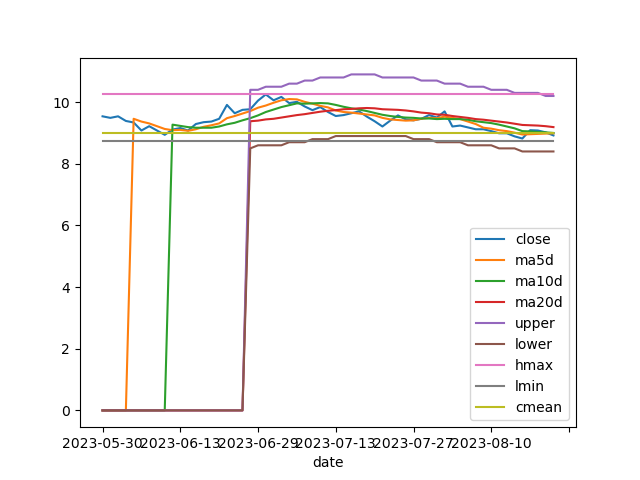

In [69]:
code
tdf = tdd.get_tdx_Exp_day_to_df(code, dl=60).sort_index(ascending=True)
cname = tdd.get_sina_data_code(code)
# plt.title(
#     stock_code + " | " + cname + " | " + str(quotes.index[-1])[: 10],
#     fontsize=14)
tdf.loc[:, ["close", "ma5d", "ma10d", "ma20d",
            "upper", "lower", "hmax", 'lmin', 'cmean']].plot()

In [70]:
tdf[tdf.columns[(tdf.columns >= "perc1d") & (tdf.columns <= "perc9d")]][-1:]

,perc1d,perc2d,perc3d,perc4d,perc5d,perc6d,perc7d,perc8d,perc9d
date,,,,,,,,,
2023-08-22,-0.1,0.9,1.0,1.1,-0.1,0.0,0.0,-0.1,0.0


In [71]:
tdf[tdf.columns[(tdf.columns >= "per1d") & (tdf.columns <= "per9d")]][-1:]

,per1d,per2d,per3d,per4d,per5d,per6d,per7d,per8d,per9d
date,,,,,,,,,
2023-08-22,-1.1,-0.7,-0.1,3.1,-0.8,-1.1,0.0,-0.8,-0.7
